### Required Module used during the programm

In [35]:
import pandas as pd
import numpy as np
import requests
#from bs4 import BeautifulSoup
import os
#!conda install -c conda-forge folium=0.5.0 --yes
import folium 
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests
   
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

%matplotlib inline
import seaborn as sns
#pip install opencage
#!conda install -c conda-forge opencage --yes
#from opencage.geocoder import OpenCageGeocode

print('Done!')

Done!


##### For the current number of the corona cases the source has been taken from  statisica.com for the total cases and the number of beds in each bundesland has been taken from the source kaggle.com which deals with the total number of corona cases. This is to see whether the total number of beds are sufficient in according to the present cases in Germany.

In [36]:
df_hos = pd.read_csv(r"C:\Users\SRIRAM\Downloads\Beds.csv", encoding = "ISO-8859-1")
df_hos.drop(['Nummer','Region','Intensivbetten_Region','EWZ Region','EWZ','Krankenhauser','Betten','Kreisebene'],inplace = True,axis= 1)
#df_hos.groupby(['Bundesland'])['Intensivbetten']
df_hos['Intensivbetten'] = df_hos['Intensivbetten'].astype(str).astype(int)
df2 =df_hos.groupby(['Bundesland'])['Intensivbetten'].sum().reset_index()
df2



,Bundesland,Intensivbetten
0,BB,745
1,BE,2899
2,BR,294
3,BW,3262
4,BY,3791
5,HE,1845
6,HH,802
7,MV,1014
8,NI,2426
9,NW,12296


### For the scrapping of the website if there are two tables then for separating to the individual tables these index help in separarting as shown in the code below:


In [38]:
d = pd.read_html('https://www.statista.com/statistics/1105401/coronavirus-covid-19-cases-cities-districts-germany/')
df  = d[0]
df

,Unnamed: 0,Number of cases
0,Berlin,4722
1,Munich,4685
2,Hamburg,3869
3,Cologne,2069
4,Rosenheim,1610
5,Heinsberg,1568
6,Aachen,1505
7,Hanover,1457
8,Esslingen,1432
9,Ludwigsburg,1308


In [39]:
df['City'] = df['Unnamed: 0']
df.drop(['Unnamed: 0'],inplace = True,axis= 1)


In [40]:
df = df[['City','Number of cases']]
df

,City,Number of cases
0,Berlin,4722
1,Munich,4685
2,Hamburg,3869
3,Cologne,2069
4,Rosenheim,1610
5,Heinsberg,1568
6,Aachen,1505
7,Hanover,1457
8,Esslingen,1432
9,Ludwigsburg,1308


#### As for the population of the individual cities there was nothing in the website that could be directly scrapped. so using the google search the population of individual cities is converted into a column, same is the case for the short form for the name of state

In [41]:
df['Population in Lakhs'] = [37.7,14.7,18.2,10.6,0.407,0.633,2.46,5.34,5.32,5.44]
df['Bundesland_1']= ['Berlin','Bavaria','Hamburg','North Rhine-Westphalia','North Rhine-Westphalia','North Rhine-Westphalia','Bavaria','Lower Saxony'
                  ,'Baden-Württemberg','Baden-Württemberg']
df['Bundesland']= ['BE','BY','HH','NW','NW','NW','BY','NI','BW','BW']
df


C:\Users\SRIRAM\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SRIRAM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SRIRAM\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,City,Number of cases,Population in Lakhs,Bundesland_1,Bundesland
0,Berlin,4722,37.700,Berlin,BE
1,Munich,4685,14.700,Bavaria,BY
2,Hamburg,3869,18.200,Hamburg,HH
3,Cologne,2069,10.600,North Rhine-Westphalia,NW
4,Rosenheim,1610,0.407,North Rhine-Westphalia,NW
5,Heinsberg,1568,0.633,North Rhine-Westphalia,NW
6,Aachen,1505,2.460,Bavaria,BY
7,Hanover,1457,5.340,Lower Saxony,NI
8,Esslingen,1432,5.320,Baden-Württemberg,BW
9,Ludwigsburg,1308,5.440,Baden-Württemberg,BW


#### As in the case of the sql using the pd.merge command the common values are merged, so there is no need of to store this data in sql and then merge. The below panda command does automatically that for us

In [42]:
results = pd.merge(df, df2, on='Bundesland')
results

,City,Number of cases,Population in Lakhs,Bundesland_1,Bundesland,Intensivbetten
0,Berlin,4722,37.700,Berlin,BE,2899
1,Munich,4685,14.700,Bavaria,BY,3791
2,Aachen,1505,2.460,Bavaria,BY,3791
3,Hamburg,3869,18.200,Hamburg,HH,802
4,Cologne,2069,10.600,North Rhine-Westphalia,NW,12296
5,Rosenheim,1610,0.407,North Rhine-Westphalia,NW,12296
6,Heinsberg,1568,0.633,North Rhine-Westphalia,NW,12296
7,Hanover,1457,5.340,Lower Saxony,NI,2426
8,Esslingen,1432,5.320,Baden-Württemberg,BW,3262
9,Ludwigsburg,1308,5.440,Baden-Württemberg,BW,3262


#### The below code shows the total available beds during the covid situation it comes around 35621 and at present there are around 5000 in serious conditional so as to not burden the health care system the government have extended the lockdown

In [43]:
df2['Intensivbetten'].sum()

35621

In [44]:
list_lat_1 = []   # create empty lists

list_long_1 = []


for index, row in df.iterrows(): # iterate over rows in dataframe


    City = row['Bundesland']       
    query = str(City)
    
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(query)
    latitude = location.latitude
    longitude = location.longitude

    

    list_lat_1.append(latitude)
    list_long_1.append(longitude)


# create new columns from lists    

df['latitude'] = list_lat_1   

df['longitude'] = list_long_1

C:\Users\SRIRAM\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\SRIRAM\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [45]:
list_lat = []   # create empty lists

list_long = []


for index, row in df.iterrows(): # iterate over rows in dataframe


    City = row['City']       
    query = str(City)
    
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(query)
    latitude = location.latitude
    longitude = location.longitude

    

    list_lat.append(latitude)
    list_long.append(longitude)


# create new columns from lists    

df['latitude'] = list_lat   

df['longitude'] = list_long

C:\Users\SRIRAM\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\SRIRAM\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [46]:
df
type(df['Number of cases'])

pandas.core.series.Series

#### This is used for creating a bubble plot using the city name, the latitude and the longitude are automatically obtained using geolocatot and the code can be seen above 

In [47]:
#reate map of Manhattan using latitude and longitude values
map_germany = folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for lat, lng, label,radius in zip(df['latitude'], df['longitude'], df['City'],df['Number of cases']):
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=radius*15,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_germany)  
    
map_germany

### This code below is used for creating the scatter plot

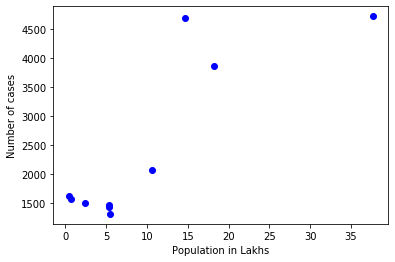

In [48]:
plt.scatter(y = df['Number of cases'], x = df['Population in Lakhs'], c = 'blue')
plt.ylabel('Number of cases')
plt.xlabel('Population in Lakhs')
plt.show()

### This code is used for creating the bar graph which is used in the visualisation

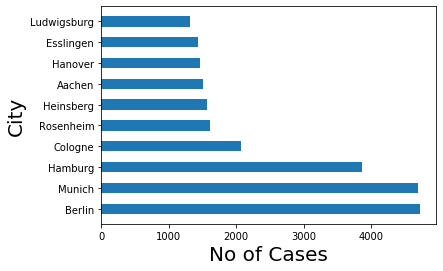

In [49]:
plt.barh(y=df['City'], width= df['Number of cases'],height = 0.5)
plt.xlabel('No of Cases',fontsize =20)
plt.ylabel('City',fontsize=20)
plt.show()

In [51]:
CLIENT_ID = 'KV5WVX2YDFIMBAI41VULN3CYWDAIE2CS3ZPNFJCNI11WU43J' # your Foursquare ID
CLIENT_SECRET = 'KU2T4ZCGK40O3532YFECQ2O0TVEGTAOGTAXLI3K2HF5N01WF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KV5WVX2YDFIMBAI41VULN3CYWDAIE2CS3ZPNFJCNI11WU43J
CLIENT_SECRET:KU2T4ZCGK40O3532YFECQ2O0TVEGTAOGTAXLI3K2HF5N01WF


In [52]:
import requests

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&near=berlin&intent=browse&radius=10000&query=krankenhaus&limit=100'.format(
  CLIENT_ID,
  CLIENT_SECRET,
  VERSION
  )

results = requests.get(url).json()
print(results)



{'meta': {'code': 200, 'requestId': '5e98007577af03001ca89fbb'}, 'response': {'venues': [{'id': '4b13820df964a520759723e3', 'name': 'Alexianer St. Hedwig-Krankenhaus', 'location': {'address': 'Große Hamburger Str. 5-11', 'crossStreet': 'Krausnickstr.', 'lat': 52.52599889399018, 'lng': 13.398555859366613, 'labeledLatLngs': [{'label': 'display', 'lat': 52.52599889399018, 'lng': 13.398555859366613}], 'postalCode': '10115', 'cc': 'DE', 'city': 'Berlin', 'state': 'Berlin', 'country': 'Deutschland', 'formattedAddress': ['Große Hamburger Str. 5-11 (Krausnickstr.)', '10115 Berlin', 'Deutschland']}, 'categories': [{'id': '4bf58dd8d48988d194941735', 'name': 'Emergency Room', 'pluralName': 'Emergency Rooms', 'shortName': 'Emergency Room', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_ems_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '502403242'}, 'referralId': 'v-1587019844', 'hasPerk': False}, {'id': '56bb4421498e69b84a67fec8', 'name': 'Medizinisches 

In [53]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

C:\Users\SRIRAM\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4b13820df964a520759723e3,Alexianer St. Hedwig-Krankenhaus,"[{'id': '4bf58dd8d48988d194941735', 'name': 'E...",v-1587019844,False,Große Hamburger Str. 5-11,Krausnickstr.,52.525999,13.398556,"[{'label': 'display', 'lat': 52.52599889399018...",10115,DE,Berlin,Berlin,Deutschland,"[Große Hamburger Str. 5-11 (Krausnickstr.), 10...",502403242,NaN
1,56bb4421498e69b84a67fec8,Medizinisches Versorgungszentrum St. Hedwig-Kr...,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",v-1587019844,False,Große Hamburger Str. 5-11,NaN,52.526414,13.397816,"[{'label': 'display', 'lat': 52.526414, 'lng':...",10115,DE,Berlin,Berlin,Deutschland,"[Große Hamburger Str. 5-11, 10115 Berlin, Deut...",534174702,NaN
2,51866984498e285dd9300017,Ehemaliges Jüdisches Krankenhaus,"[{'id': '4deefb944765f83613cdba6e', 'name': 'H...",v-1587019844,False,NaN,NaN,52.526776,13.394741,"[{'label': 'display', 'lat': 52.52677604230003...",NaN,DE,Berlin,Berlin,Deutschland,"[Berlin, Deutschland]",NaN,Mitte
3,4cb58a35f6616dcb1417d808,Ev. Krankenhaus Königin Elisabeth Herzberge,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1587019844,False,Herzbergstr. 79,NaN,52.527374,13.507592,"[{'label': 'display', 'lat': 52.52737372628164...",10365,DE,Berlin,Berlin,Deutschland,"[Herzbergstr. 79, 10365 Berlin, Deutschland]",NaN,NaN
4,4b61565af964a5207a102ae3,St. Joseph Krankenhaus,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1587019844,False,Wüsthoffstr. 16,NaN,52.478128,13.373559,"[{'label': 'display', 'lat': 52.47812786819287...",12101,DE,Berlin,Berlin,Deutschland,"[Wüsthoffstr. 16, 12101 Berlin, Deutschland]",NaN,NaN
5,4c4ebabe1b8e1b8de88d9e27,St. Gertrauden Krankenhaus,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1587019844,False,Paretzer Str. 12,NaN,52.481460,13.317102,"[{'label': 'display', 'lat': 52.48145979159665...",10713,DE,Berlin,Berlin,Deutschland,"[Paretzer Str. 12, 10713 Berlin, Deutschland]",NaN,NaN
6,4b629f84f964a520294d2ae3,Sana Klinikum Lichtenberg Standort Oskar-Zieth...,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1587019844,False,Fanninger Str. 32,NaN,52.513217,13.495932,"[{'label': 'display', 'lat': 52.51321747116901...",10365,DE,Berlin,Berlin,Deutschland,"[Fanninger Str. 32, 10365 Berlin, Deutschland]",NaN,NaN
7,4fd5c805e4b06383cd3cecfd,Cafeteria | Jüdisches Krankenhaus,"[{'id': '4bf58dd8d48988d120951735', 'name': 'F...",v-1587019844,False,Heinz-Galinski-Str. 1,Haus G,52.555873,13.371692,"[{'label': 'display', 'lat': 52.55587250377454...",13347,DE,Berlin,Berlin,Deutschland,"[Heinz-Galinski-Str. 1 (Haus G), 13347 Berlin,...",NaN,NaN
8,4e00438eaeb76b61098462ab,Alexianer St. Joseph-Krankenhaus Berlin-Weißensee,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1587019844,False,Gartenstr. 1,NaN,52.551091,13.468259,"[{'label': 'display', 'lat': 52.5510909875702,...",13088,DE,Berlin,Berlin,Deutschland,"[Gartenstr. 1, 13088 Berlin, Deutschland]",NaN,NaN
9,50163e53e4b097af8b54713a,St. Hedwig Krankenhaus - Dr. Gogol,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",v-1587019844,False,Große Hamburger Straße 5-11,NaN,52.526124,13.398108,"[{'label': 'display', 'lat': 52.52612358395932...",NaN,DE,Berlin,Berlin,Deutschland,"[Große Hamburger Straße 5-11, Berlin, Deutschl...",NaN,NaN


# Using the foursquare api the hospitals around berlin are found which amounts to 50 hospital

In [54]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Alexianer St. Hedwig-Krankenhaus,Emergency Room,Große Hamburger Str. 5-11,Krausnickstr.,52.525999,13.398556,"[{'label': 'display', 'lat': 52.52599889399018...",10115,DE,Berlin,Berlin,Deutschland,"[Große Hamburger Str. 5-11 (Krausnickstr.), 10...",NaN,4b13820df964a520759723e3
1,Medizinisches Versorgungszentrum St. Hedwig-Kr...,Medical Center,Große Hamburger Str. 5-11,NaN,52.526414,13.397816,"[{'label': 'display', 'lat': 52.526414, 'lng':...",10115,DE,Berlin,Berlin,Deutschland,"[Große Hamburger Str. 5-11, 10115 Berlin, Deut...",NaN,56bb4421498e69b84a67fec8
2,Ehemaliges Jüdisches Krankenhaus,Historic Site,NaN,NaN,52.526776,13.394741,"[{'label': 'display', 'lat': 52.52677604230003...",NaN,DE,Berlin,Berlin,Deutschland,"[Berlin, Deutschland]",Mitte,51866984498e285dd9300017
3,Ev. Krankenhaus Königin Elisabeth Herzberge,Hospital,Herzbergstr. 79,NaN,52.527374,13.507592,"[{'label': 'display', 'lat': 52.52737372628164...",10365,DE,Berlin,Berlin,Deutschland,"[Herzbergstr. 79, 10365 Berlin, Deutschland]",NaN,4cb58a35f6616dcb1417d808
4,St. Joseph Krankenhaus,Hospital,Wüsthoffstr. 16,NaN,52.478128,13.373559,"[{'label': 'display', 'lat': 52.47812786819287...",12101,DE,Berlin,Berlin,Deutschland,"[Wüsthoffstr. 16, 12101 Berlin, Deutschland]",NaN,4b61565af964a5207a102ae3
5,St. Gertrauden Krankenhaus,Hospital,Paretzer Str. 12,NaN,52.481460,13.317102,"[{'label': 'display', 'lat': 52.48145979159665...",10713,DE,Berlin,Berlin,Deutschland,"[Paretzer Str. 12, 10713 Berlin, Deutschland]",NaN,4c4ebabe1b8e1b8de88d9e27
6,Sana Klinikum Lichtenberg Standort Oskar-Zieth...,Hospital,Fanninger Str. 32,NaN,52.513217,13.495932,"[{'label': 'display', 'lat': 52.51321747116901...",10365,DE,Berlin,Berlin,Deutschland,"[Fanninger Str. 32, 10365 Berlin, Deutschland]",NaN,4b629f84f964a520294d2ae3
7,Cafeteria | Jüdisches Krankenhaus,Food Court,Heinz-Galinski-Str. 1,Haus G,52.555873,13.371692,"[{'label': 'display', 'lat': 52.55587250377454...",13347,DE,Berlin,Berlin,Deutschland,"[Heinz-Galinski-Str. 1 (Haus G), 13347 Berlin,...",NaN,4fd5c805e4b06383cd3cecfd
8,Alexianer St. Joseph-Krankenhaus Berlin-Weißensee,Hospital,Gartenstr. 1,NaN,52.551091,13.468259,"[{'label': 'display', 'lat': 52.5510909875702,...",13088,DE,Berlin,Berlin,Deutschland,"[Gartenstr. 1, 13088 Berlin, Deutschland]",NaN,4e00438eaeb76b61098462ab
9,St. Hedwig Krankenhaus - Dr. Gogol,Medical Center,Große Hamburger Straße 5-11,NaN,52.526124,13.398108,"[{'label': 'display', 'lat': 52.52612358395932...",NaN,DE,Berlin,Berlin,Deutschland,"[Große Hamburger Straße 5-11, Berlin, Deutschl...",NaN,50163e53e4b097af8b54713a


### The name of the hospitals in Berlin are mentioned below

0                      Alexianer St. Hedwig-Krankenhaus
1     Medizinisches Versorgungszentrum St. Hedwig-Kr...
2                      Ehemaliges Jüdisches Krankenhaus
3           Ev. Krankenhaus Königin Elisabeth Herzberge
4                                St. Joseph Krankenhaus
5                            St. Gertrauden Krankenhaus
6     Sana Klinikum Lichtenberg Standort Oskar-Zieth...
7                   Ev. Krankenhaus Ludwigsfelde-Teltow
8                     Cafeteria | Jüdisches Krankenhaus
9     Alexianer St. Joseph-Krankenhaus Berlin-Weißensee
10                    Alexianer Krankenhaus Hedwigshöhe
11                   St. Hedwig Krankenhaus - Dr. Gogol
12                    H Krankenhaus Köpenick / Südseite
13                   Evangelisches Krankenhaus Hubertus
14                          Ev. Krankenhaus Woltersdorf
15     Achenbach Krankenhaus - Klinikum Dahme-Spreewald
16    Prostata-Zentrum Berlin im St. Hedwig-Krankenhaus
17                    Radiologie St. Hedwig-Kran

#### The same is done for the hannover and for hannover the number of hospital turns out to be four

In [55]:
url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&near=hannover&intent=browse&radius=10000&query=krankenhaus&limit=100'.format(
  CLIENT_ID,
  CLIENT_SECRET,
  VERSION
  )

results1 = requests.get(url1).json()
print(results1)

{'meta': {'code': 200, 'requestId': '5e980047c94979001b8330d6'}, 'response': {'venues': [{'id': '4b814eaff964a520a59e30e3', 'name': 'DRK-Krankenhaus Clementinenhaus', 'location': {'address': 'Lützerodestr. 1', 'crossStreet': 'Kollenrodtstr.', 'lat': 52.386909, 'lng': 9.74475, 'labeledLatLngs': [{'label': 'display', 'lat': 52.386909, 'lng': 9.74475}], 'postalCode': '30161', 'cc': 'DE', 'city': 'Hannover', 'state': 'Niedersachsen', 'country': 'Deutschland', 'formattedAddress': ['Lützerodestr. 1 (Kollenrodtstr.)', '30161 Hannover', 'Deutschland']}, 'categories': [{'id': '4bf58dd8d48988d196941735', 'name': 'Hospital', 'pluralName': 'Hospitals', 'shortName': 'Hospital', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1587019871', 'hasPerk': False}, {'id': '52c58dc1498ef5012b0a6928', 'name': 'H Laatzen / Krankenhaus', 'location': {'address': 'Hildesheimer Str.', 'crossStreet': 'Würzburger Str.', 'lat': 52.3

In [69]:
venues1 = results1['response']['venues']

# tranform venues into a dataframe
dataframe1 = json_normalize(venues1)
dataframe1

C:\Users\SRIRAM\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4b814eaff964a520a59e30e3,DRK-Krankenhaus Clementinenhaus,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1587019871,False,Lützerodestr. 1,Kollenrodtstr.,52.386909,9.744750,"[{'label': 'display', 'lat': 52.386909, 'lng':...",30161,DE,Hannover,Niedersachsen,Deutschland,"[Lützerodestr. 1 (Kollenrodtstr.), 30161 Hanno..."
1,52c58dc1498ef5012b0a6928,H Laatzen / Krankenhaus,"[{'id': '52f2ab2ebcbc57f1066b8b51', 'name': 'T...",v-1587019871,False,Hildesheimer Str.,Würzburger Str.,52.307103,9.799452,"[{'label': 'display', 'lat': 52.30710288687317...",NaN,DE,Laatzen,Niedersachsen,Deutschland,"[Hildesheimer Str. (Würzburger Str.), Laatzen,..."
2,50164526e4b00c72b7b1c099,Lister Krankenhaus,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1587019871,False,Lister Kirchweg 43,NaN,52.395651,9.746594,"[{'label': 'display', 'lat': 52.39565123422855...",30163,DE,Hannover,Niedersachsen,Deutschland,"[Lister Kirchweg 43, 30163 Hannover, Deutschland]"
3,4c7be76b93ef236a24b5b60f,Diakoniekrankenhaus Friederikenstift,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1587019871,False,Humboldtstr. 5,NaN,52.370866,9.724268,"[{'label': 'display', 'lat': 52.37086648247431...",30169,DE,Hannover,Niedersachsen,Deutschland,"[Humboldtstr. 5, 30169 Hannover, Deutschland]"
4,4bd5c470637ba59347f5f670,KRH Klinikum Nordstadt,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1587019871,False,Haltenhoffstr. 41,NaN,52.392010,9.715605,"[{'label': 'display', 'lat': 52.39201003620639...",30167,DE,Hannover,Niedersachsen,Deutschland,"[Haltenhoffstr. 41, 30167 Hannover, Deutschland]"


In [74]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns1 = ['name', 'categories'] + [col for col in dataframe1.columns if col.startswith('location.')] + ['id']
dataframe_filtered1 = dataframe1.loc[:, filtered_columns1]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered1['categories'] = dataframe_filtered1.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered1.columns = [column.split('.')[-1] for column in dataframe_filtered1.columns]

dataframe_filtered1

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,postalCode,cc,city,state,country,formattedAddress,id
0,DRK-Krankenhaus Clementinenhaus,Hospital,Lützerodestr. 1,Kollenrodtstr.,52.386909,9.744750,"[{'label': 'display', 'lat': 52.386909, 'lng':...",30161,DE,Hannover,Niedersachsen,Deutschland,"[Lützerodestr. 1 (Kollenrodtstr.), 30161 Hanno...",4b814eaff964a520a59e30e3
1,H Laatzen / Krankenhaus,Tram Station,Hildesheimer Str.,Würzburger Str.,52.307103,9.799452,"[{'label': 'display', 'lat': 52.30710288687317...",NaN,DE,Laatzen,Niedersachsen,Deutschland,"[Hildesheimer Str. (Würzburger Str.), Laatzen,...",52c58dc1498ef5012b0a6928
2,Lister Krankenhaus,Hospital,Lister Kirchweg 43,NaN,52.395651,9.746594,"[{'label': 'display', 'lat': 52.39565123422855...",30163,DE,Hannover,Niedersachsen,Deutschland,"[Lister Kirchweg 43, 30163 Hannover, Deutschland]",50164526e4b00c72b7b1c099
3,Diakoniekrankenhaus Friederikenstift,Hospital,Humboldtstr. 5,NaN,52.370866,9.724268,"[{'label': 'display', 'lat': 52.37086648247431...",30169,DE,Hannover,Niedersachsen,Deutschland,"[Humboldtstr. 5, 30169 Hannover, Deutschland]",4c7be76b93ef236a24b5b60f
4,KRH Klinikum Nordstadt,Hospital,Haltenhoffstr. 41,NaN,52.392010,9.715605,"[{'label': 'display', 'lat': 52.39201003620639...",30167,DE,Hannover,Niedersachsen,Deutschland,"[Haltenhoffstr. 41, 30167 Hannover, Deutschland]",4bd5c470637ba59347f5f670


In [75]:
query = 'Germany'
    
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(query)
latitude = location.latitude
longitude = location.longitude

In [76]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=5) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    
for lat1, lng1, label1 in zip(dataframe_filtered1.lat, dataframe_filtered1.lng, dataframe_filtered1.categories):
    folium.features.CircleMarker(
        [lat1, lng1],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [77]:
# create map and display it
germany_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
germany_map